In [27]:
#ARIMA(auto regressive integred moving avg)
"""
ARIMA is a genralization of ARMA(AUTO REGRESSIVE MOVING AVERAGE) Mmodel
ARIMA:
.non-seasonal ARIMA
.seasonal ARIMA(SARIMA)
SARIMA WITH exogenous variables such as SARIMAX
.BASICS OF a ARIMA:
ARIMA model applied to -NON-stationary data
-------.non-seasonal ARIMA model are generally denoted
ARIMA(p,d,q)#non negative integer
AR(P)-AUTOREGRESSION
.depended relship between current obs over a previous period
I(d)-INTEGRATED
differencing of observation
MA(q):Moving avg
dependency betn moving avg model applied to lagged observation

.stationary- has constant mean and varience over time
*to test the stationarity? we use Augmented DIcky fuller test
*if data is not stationary you need to transform in stationary
(use differencing)
----for seasonal data(one way)
use diff by season
------
if stationary?then
 two way to choose p,d,q
  1.acf and pacf plots
  2.grid search

SARIMA(P,D,Q)-seasonal data
"""

'\nARIMA is a genralization of ARMA(AUTO REGRESSIVE MOVING AVERAGE) Mmodel\nARIMA:\n.non-seasonal ARIMA\n.seasonal ARIMA(SARIMA)\nSARIMA WITH exogenous variables such as SARIMAX\n.BASICS OF a ARIMA:\nARIMA model applied to -NON-stationary data\n-------.non-seasonal ARIMA model are generally denoted\nARIMA(p,d,q)#non negative integer\nAR(P)-AUTOREGRESSION\n.depended relship between current obs over a previous period\nI(d)-INTEGRATED\ndifferencing of observation\nMA(q):Moving avg\ndependency betn moving avg model applied to lagged observation\n\n.stationary- has constant mean and varience over time\n*to test the stationarity? we use Augmented DIcky fuller test\n*if data is not stationary you need to transform in stationary\n(use differencing)\n----for seasonal data(one way)\nuse diff by season\n------\nif stationary?then\n two way to choose p,d,q\n  1.acf and pacf plots\n  2.grid search\n\nSARIMA(P,D,Q)-seasonal data\n'

In [28]:
#AR WITH stats model
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults


In [29]:
df = pd.read_csv('tser_lec/Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [30]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


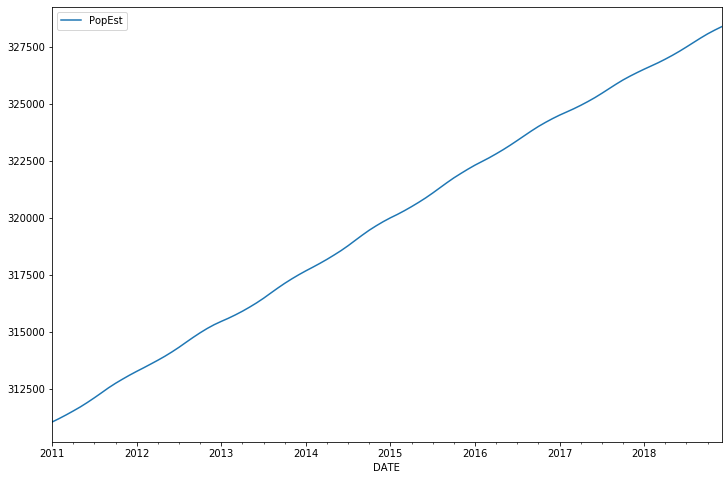

In [31]:
df.plot(figsize=(12,8))

In [32]:
len(df)

96

In [33]:
train=df.iloc[:84]
test=df.iloc[:84]

In [34]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
model1 = AR(train['PopEst'])
model2 = AR(train['PopEst'])
model3 = AR(train['PopEst'])
model4= AR(train['PopEst'])

AR1fit = model1.fit(maxlag=1,method='mle')

In [36]:
AR1fit.k_ar

1

In [37]:
AR1fit.aic

10.533689612341348

In [38]:
AR1fit.params

const        147.296808
L1.PopEst      0.999537
dtype: float64

In [39]:
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        147.296808
L1.PopEst      0.999537
dtype: float64


In [40]:
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False)
predictions1=predictions1.rename('AR(1) Predictions')

In [41]:
predictions1


2018-01-01    326374.208364
2018-02-01    326370.418482
2018-03-01    326366.630356
2018-04-01    326362.843982
2018-05-01    326359.059362
                  ...      
2024-08-01    326080.149481
2024-09-01    326076.495727
2024-10-01    326072.843664
2024-11-01    326069.193292
2024-12-01    326065.544610
Freq: MS, Name: AR(1) Predictions, Length: 84, dtype: float64

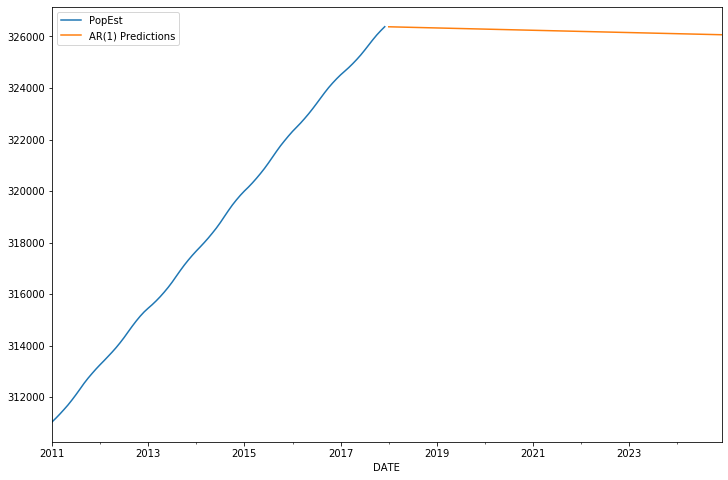

In [42]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [43]:
AR2fit =model2.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        137.361529
L1.PopEst      1.996476
L2.PopEst     -0.996907
dtype: float64


In [44]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

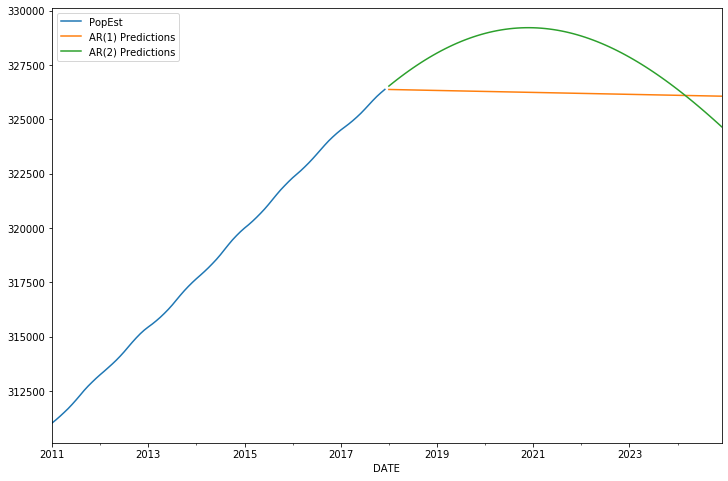

In [45]:
test.plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [46]:
AR8fit = model3.fit(ic='t-stat')
print(f'Lag: {AR8fit.k_ar}')
print(f'Coefficients:\n{AR8fit.params}')

Lag: 8
Coefficients:
const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64


In [47]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(8) Predictions'

predictions8 = AR8fit.predict(start=start,end=end,dynamic=False).rename(rename)

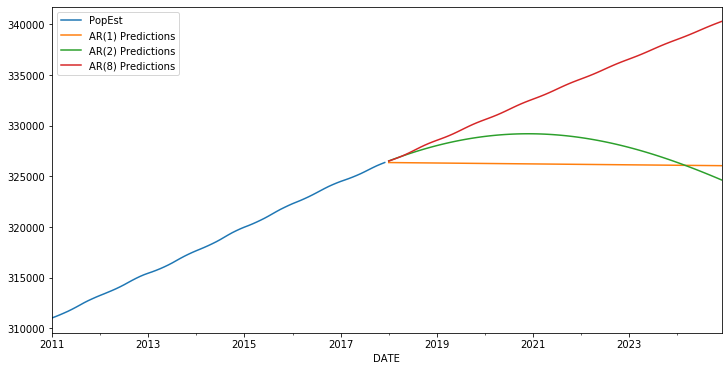

In [48]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));

In [49]:
AR11fit = model4.fit(method='mle')
print(f'Lag: {AR11fit.k_ar}')
print(f'Coefficients:\n{AR11fit.params}')

Lag: 11
Coefficients:
const         96.178185
L1.PopEst      2.310060
L2.PopEst     -2.087646
L3.PopEst      1.401213
L4.PopEst     -1.066483
L5.PopEst      0.743772
L6.PopEst     -0.795203
L7.PopEst      0.703824
L8.PopEst     -0.172876
L9.PopEst      0.187809
L10.PopEst    -0.218017
L11.PopEst    -0.006756
dtype: float64


In [50]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = AR11fit.predict(start=start,end=end,dynamic=False).rename(rename)

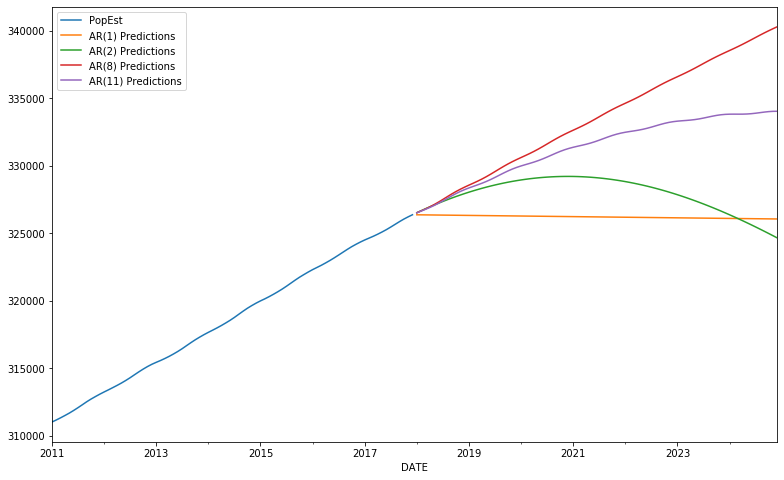

In [51]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));
predictions11.plot(legend=True,figsize=(13,8));

In [52]:
#EVALUATING
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)','AR(11)']
preds = [predictions1, predictions2, predictions8,predictions11]  

In [53]:
for i in range(4):
    error=mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR(1) MSE was :77366160.26111402
AR(2) MSE was :111337679.87816377
AR(8) MSE was :217943789.8534475
AR(11) MSE was :163797957.56477335


In [54]:
#anthor method:
modls = [AR1fit,AR2fit,AR8fit,AR11fit]
for i in range(4):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 10.534
AR(2) AIC: 5.1557
AR(8) AIC: 3.5878
AR(11) AIC: 3.6227


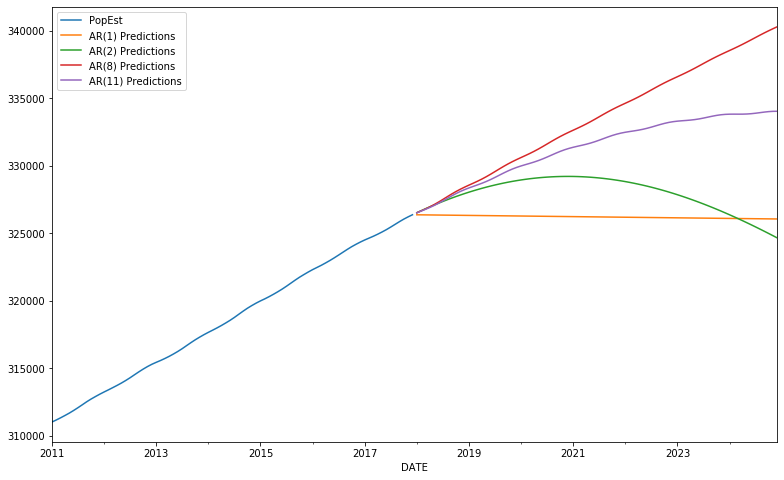

In [55]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True,figsize=(12,6));
predictions11.plot(legend=True,figsize=(13,8));

In [59]:
#forecasting
#population for 2020
# First, retrain the model on the full dataset
model5 = AR(df['PopEst'])

In [60]:
# Next, fit the model
AR8fit = model5.fit(maxlag=11,method='mle')

In [61]:
# Make predictions
fcast = AR8fit.predict(start=len(df), end=len(df)+24, dynamic=False).rename('Forecast')


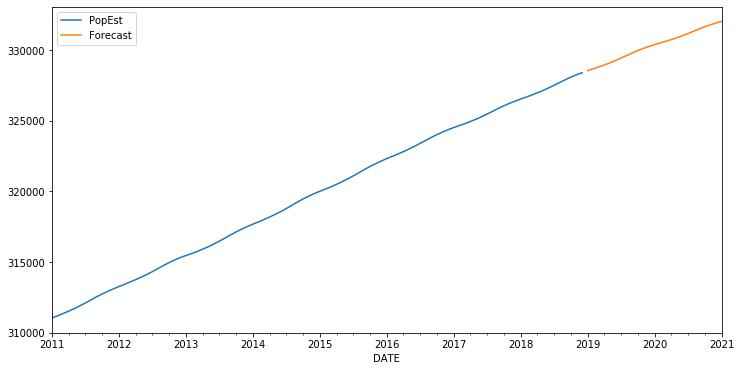

In [62]:
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

# choosing the arima orders

In [63]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset#seasonal
df1 = pd.read_csv('tser_lec/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset#non seasonal
df2 = pd.read_csv('tser_lec/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [89]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`

In [91]:
stepwise_fit=auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)
"""stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()"""

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=2650.760, BIC=2658.555, Time=0.017 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=2565.234, BIC=2576.925, Time=0.060 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=2463.584, BIC=2475.275, Time=0.079 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=2648.768, BIC=2652.665, Time=0.000 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=2460.154, BIC=2475.743, Time=0.165 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=2461.271, BIC=2480.757, Time=0.203 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.751, BIC=2480.237, Time=0.769 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=2460.722, BIC=2476.311, Time=0.307 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=2536.154, BIC

"stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,\n                          max_p=6, max_q=3, m=12,\n                          seasonal=False,\n                          d=None, trace=True,\n                          error_action='ignore',   # we don't want to know if an order does not work\n                          suppress_warnings=True,  # we don't want convergence warnings\n                          stepwise=True)           # set to stepwise\n\nstepwise_fit.summary()"

In [92]:
#auto_arima(df2['Births'],error_action='ignore').summary()

In [93]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Mon, 11 May 2020   AIC                           2460.154
Time:                        17:19:11   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
#seasonal
stepwise_fit=auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=0,max_p=4,max_q=4,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=1034.075, BIC=1045.576, Time=0.393 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.341 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.411 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.001 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=1022.343, BIC=1030.968, Time=0.100 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=1021.137, BIC=1035.513, Time=1.000 seconds
Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=1017.164, BIC=1034.415, Time=3.857 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=102

In [95]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.921
Date:                            Mon, 11 May 2020   AIC                           1015.841
Time:                                    17:19:30   BIC                           1033.092
Sample:                                         0   HQIC                          1022.851
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.033      0.007      0.994      -0.064       0.065
ma.L1         -0.4261      0.068     -6.255      0.000      -0.560      -0.293
ar.S.L12       0.6722      0.162      4.155      0.000       0.355       0.989
ar.S.L24       0.3268      0.094      3.481      0.000       0.143       0.511
ma.S.L12      -0.9788      1.478     -0.662      0.508      -3.876       1.918
sigma2       110.3866    139.923      0.789      0.430    -163.858     384.631
===================================================================================
Ljung-Box (Q):                       52.79   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.08   Prob(JB):                         0.03
Heteroskedasticity (H):               2.81   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


# ARMA(p,q) and ARIMA(p,d,q)¶

In [96]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df1 = pd.read_csv('tser_lec/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

df2 = pd.read_csv('tser_lec/Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

# ARMA

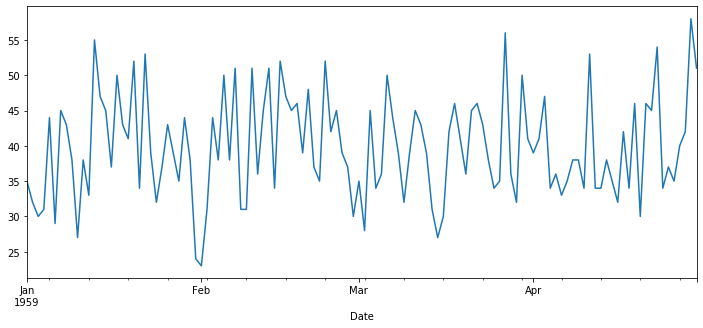

In [97]:
df1['Births'].plot(figsize=(12,5));

In [98]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [99]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [107]:
auto_arima(df1['Births'],seasonal=False).summary()
#if it is arma

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Mon, 11 May 2020   AIC                            823.489
Time:                        17:50:15   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

# Fit an ARMA(p,q) Model

In [108]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 11 May 2020   AIC                            627.809
Time:                        17:53:39   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [110]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [113]:
predictions


1959-04-01    39.982227
1959-04-02    39.992613
1959-04-03    39.809832
1959-04-04    39.848174
1959-04-05    39.761540
1959-04-06    39.794256
1959-04-07    39.750502
1959-04-08    39.772835
1959-04-09    39.749662
1959-04-10    39.763669
1959-04-11    39.750993
1959-04-12    39.759434
1959-04-13    39.752356
1959-04-14    39.757339
1959-04-15    39.753337
1959-04-16    39.756246
1959-04-17    39.753966
1959-04-18    39.755653
1959-04-19    39.754349
1959-04-20    39.755325
1959-04-21    39.754577
1959-04-22    39.755140
1959-04-23    39.754710
1959-04-24    39.755034
1959-04-25    39.754787
1959-04-26    39.754974
1959-04-27    39.754832
1959-04-28    39.754940
1959-04-29    39.754858
1959-04-30    39.754920
Freq: D, Name: ARMA(2,2) Predictions, dtype: float64

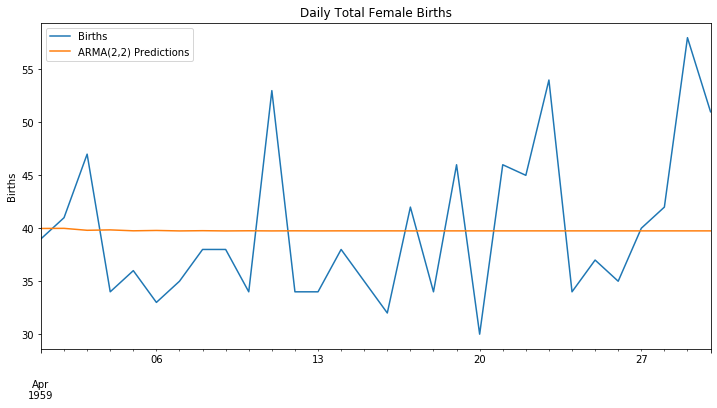

In [114]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [115]:
test.mean()

Births    39.833333
dtype: float64

In [116]:
predictions.mean()
#model is able to predict the mean avg of next month

39.77743596633806